# Multivariate Resemblance Analysis (MRA) Dataset A
In this notebook the multivariate resemblance analysis of Dataset A is performed for all STDG approaches.

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home directory of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from multivariate_resemblance import get_numerical_correlations
from multivariate_resemblance import plot_correlations
from multivariate_resemblance import get_categorical_correlations
from multivariate_resemblance import compute_mra_score

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/A_Diabetes_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/A_Diabetes_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/A_Diabetes_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/A_Diabetes_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/A_Diabetes_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','age','admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum',
                      'A1Cresult','change','diabetesMed','readmitted']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':        encounter_id  patient_nbr  gender      age admission_type_id  \
 0          81844290        94788  Female  [70-80)                 1   
 1         396159158    135023315    Male  [50-60)                 1   
 2          31258956     18397782    Male  [80-90)                 1   
 3         210691074     67509558    Male  [80-90)                 1   
 4         104902980     23272362  Female  [70-80)                 1   
 ...             ...          ...     ...      ...               ...   
 81407      31296060      3344202    Male  [70-80)                 1   
 81408     159139902     93611655    Male  [60-70)                 5   
 81409     232191828     85600899    Male  [70-80)                 3   
 81410       6740700      8208234  Female  [60-70)                 6   
 81411      60115668     77943780  Female  [40-50)                 6   
 
       discharge_disposition_id admission_source_id  time_in_hospital  \
 0                            1                   7  

## 2. Plot PPC matrixes and calculate matrixes norms

In [5]:
#compute correlation matrixes for all datasets
cors_numerical = dict()
norms_numerical = dict()
for name in DATA_TYPES :
    cors_numerical[name], norms_numerical[name] = get_numerical_correlations(data[name])
norms_numerical

{'Real': 3.5489, 'GM': 3.4884, 'SDV': 3.552, 'CTGAN': 3.6043, 'WGANGP': 5.3697}

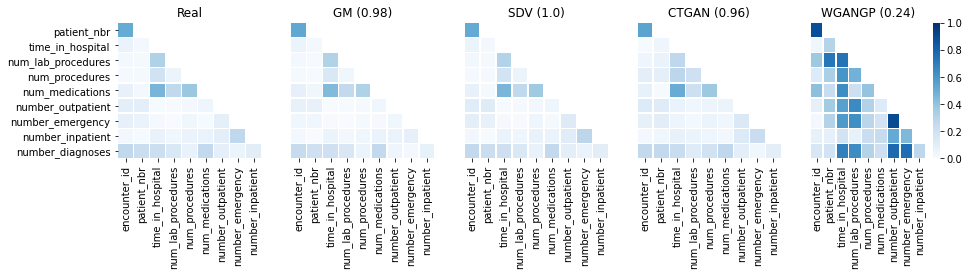

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_numerical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    
    
    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_numerical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
    
fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/PPC_Matrices.svg', bbox_inches='tight')

## 3. Plot correlations for categorical variables and calculate matrixes norms

In [7]:
#compute correlation matrixes for all datasets
cors_categorical = dict()
norms_categorical = dict()
for name in DATA_TYPES :
    cors_categorical[name], norms_categorical[name] = get_categorical_correlations(data[name])
norms_categorical

{'Real': 1.6232,
 'GM': 1.5073,
 'SDV': 1.4454,
 'CTGAN': 1.8627,
 'WGANGP': 3.2951}

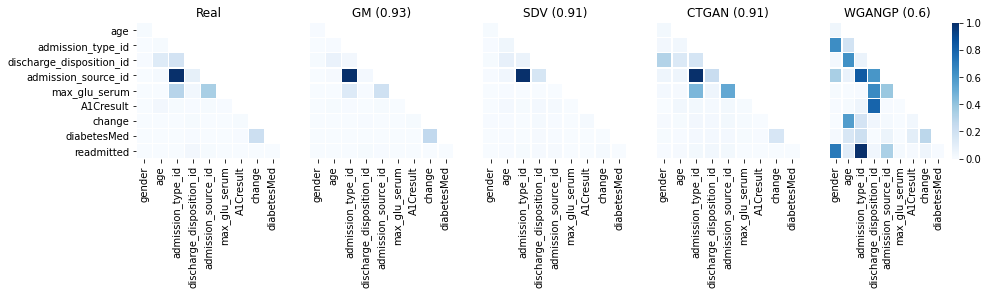

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))
first = True

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_categorical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    

    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_categorical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
        
fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/Categorical_Matrices.svg', bbox_inches='tight')

## 4. Explore the results

In [9]:
norms_numerical

{'Real': 3.5489, 'GM': 3.4884, 'SDV': 3.552, 'CTGAN': 3.6043, 'WGANGP': 5.3697}

In [10]:
norms_categorical

{'Real': 1.6232,
 'GM': 1.5073,
 'SDV': 1.4454,
 'CTGAN': 1.8627,
 'WGANGP': 3.2951}

In [11]:
norms_data = [np.asarray(list(norms_numerical.values())), np.asarray(list(norms_categorical.values()))]
df_norms = pd.DataFrame(data=norms_data, columns=DATA_TYPES, index=['PPC_MATRIX_NORMS','CATEGORICAL_CORS_MATRIX_NORMS'])
df_norms.to_csv('MULTIVARIATE RESEMBLANCE RESULTS/Correlation_Matrix_Norms.csv')
df_norms

,Real,GM,SDV,CTGAN,WGANGP
PPC_MATRIX_NORMS,3.5489,3.4884,3.5520,3.6043,5.3697
CATEGORICAL_CORS_MATRIX_NORMS,1.6232,1.5073,1.4454,1.8627,3.2951
